In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import pandas as pd
import json
import geojson
from copy import deepcopy


In [3]:
thailand_geojson_path = "../../data/thailand-provinces.geojson"
rounded_geo_json_path = "../../data/rounded-thailand-provinces.geojson"
skip_1_geo_json_path = "../../data/skip-1-rounded-thailand-provinces.geojson"
skip_2_geo_json_path = "../../data/skip-2-rounded-thailand-provinces.geojson"

update_thailand = "../../data/update_thailand.json"


In [4]:
with open(update_thailand, 'r') as file:
    geojson_data = geojson.load(file)




In [5]:
eng_to_thai_key = {
    'Amnat Charoen': 'อำนาจเจริญ', 
    'Ang Thong': 'อ่างทอง', 
    'Bangkok Metropolis': 'กรุงเทพมหานคร', 
    'Bueng Kan': "บึงกาฬ",
    'Buri Ram': 'บุรีรัมย์', 
    'Chachoengsao': 'ฉะเชิงเทรา', 
    'Chai Nat': 'ชัยนาท', 
    'Chaiyaphum': 'ชัยภูมิ', 
    'Chanthaburi': 'จันทบุรี', 
    'Chiang Mai': 'เชียงใหม่', 
    'Chiang Rai': 'เชียงราย', 
    'Chon Buri': 'ชลบุรี', 
    'Chumphon': 'ชุมพร', 
    'Kalasin': 'กาฬสินธุ์', 
    'Kamphaeng Phet': 'กำแพงเพชร', 
    'Kanchanaburi': 'กาญจนบุรี', 
    'Khon Kaen': 'ขอนแก่น', 
    'Krabi': 'กระบี่', 
    'Lampang': 'ลำปาง', 
    'Lamphun': 'ลำพูน', 
    'Loei': 'เลย', 
    'Lop Buri': 'ลพบุรี', 
    'Mae Hong Son': 'แม่ฮ่องสอน', 
    'Maha Sarakham': 'มหาสารคาม', 
    'Mukdahan': 'มุกดาหาร', 
    'Nakhon Nayok': 'นครนายก', 
    'Nakhon Pathom': 'นครปฐม', 
    'Nakhon Phanom': 'นครพนม', 
    'Nakhon Ratchasima': 'นครราชสีมา', 
    'Nakhon Sawan': 'นครสวรรค์', 
    'Nakhon Si Thammarat': 'นครศรีธรรมราช', 
    'Nan': 'น่าน',
    'Narathiwat': 'นราธิวาส',
    'Nong Bua Lam Phu': 'หนองบัวลำภู', 
    'Nong Khai': 'หนองคาย', 
    'Nonthaburi': 'นนทบุรี', 
    'Pathum Thani': 'ปทุมธานี', 
    'Pattani': 'ปัตตานี', 
    'Phangnga': 'พังงา', 
    'Phatthalung (Songkhla Lake)': 39, 
    'Phatthalung': 'พัทลุง', 
    'Phayao': 'พะเยา', 
    'Phetchabun': 'เพชรบูรณ์', 
    'Phetchaburi': 'เพชรบุรี', 
    'Phichit': 'พิจิตร', 
    'Phitsanulok': 'พิษณุโลก', 
    'Phra Nakhon Si Ayutthaya': 'พระนครศรีอยุธยา', 
    'Phrae': 'แพร่', 
    'Phuket': 'ภูเก็ต', 
    'Prachin Buri': 'ปราจีนบุรี', 
    'Prachuap Khiri Khan': 'ประจวบคีรีขันธ์', 
    'Ranong': 'ระนอง', 
    'Ratchaburi': 'ราชบุรี', 
    'Rayong': 'ระยอง', 
    'Roi Et': 'ร้อยเอ็ด', 
    'Sa Kaeo': 'สระแก้ว', 
    'Sakon Nakhon': 'สกลนคร', 
    'Samut Prakan': 'สมุทรปราการ', 
    'Samut Sakhon': 'สมุทรสาคร', 
    'Samut Songkhram': 'สมุทรสงคราม', 
    'Saraburi': 'สระบุรี', 
    'Satun': 'สตูล', 
    'Si Sa Ket': 'ศรีสะเกษ', 
    'Sing Buri': 'สิงห์บุรี', 
    'Songkhla (Songkhla Lake)': 64, 
    'Songkhla': 'สงขลา', 
    'Sukhothai': 'สุโขทัย', 
    'Suphan Buri': 'สุพรรณบุรี', 
    'Surat Thani': 'สุราษฎร์ธานี', 
    'Surin': 'สุรินทร์', 
    'Tak': 'ตาก', 
    'Trang': 'ตรัง', 
    'Trat': 'ตราด', 
    'Ubon Ratchathani': 'อุบลราชธานี', 
    'Udon Thani': 'อุดรธานี', 
    'Uthai Thani': 'อุทัยธานี', 
    'Uttaradit': 'อุตรดิตถ์', 
    'Yala': 'ยะลา', 
    'Yasothon': 'ยโสธร'
}

In [6]:
thai_to_eng = {th: eng for th,eng in eng_to_thai_key.items()}

In [7]:
for i in geojson_data["features"]:
    print(i["properties"]["NAME_1"], i["properties"]["ID_0"], i["properties"]["ID_1"])

Amnat Charoen 228 1
Ang Thong 228 2
Bangkok Metropolis 228 3
Bueng Kan 228 4
Buri Ram 228 5
Chachoengsao 228 6
Chai Nat 228 7
Chaiyaphum 228 8
Chanthaburi 228 9
Chiang Mai 228 10
Chiang Rai 228 11
Chon Buri 228 12
Chumphon 228 13
Kalasin 228 14
Kamphaeng Phet 228 15
Kanchanaburi 228 16
Khon Kaen 228 17
Krabi 228 18
Lampang 228 19
Lamphun 228 20
Loei 228 21
Lop Buri 228 22
Mae Hong Son 228 23
Maha Sarakham 228 24
Mukdahan 228 25
Nakhon Nayok 228 26
Nakhon Pathom 228 27
Nakhon Phanom 228 28
Nakhon Ratchasima 228 29
Nakhon Sawan 228 30
Nakhon Si Thammarat 228 31
Nan 228 32
Narathiwat 228 33
Nong Bua Lam Phu 228 34
Nong Khai 228 35
Nonthaburi 228 36
Pathum Thani 228 37
Pattani 228 38
Phangnga 228 39
Phatthalung 228 40
Phayao 228 41
Phetchabun 228 42
Phetchaburi 228 43
Phichit 228 44
Phitsanulok 228 45
Phra Nakhon Si Ayutthaya 228 46
Phrae 228 47
Phuket 228 48
Prachin Buri 228 49
Prachuap Khiri Khan 228 50
Ranong 228 51
Ratchaburi 228 52
Rayong 228 53
Roi Et 228 54
Sa Kaeo 228 55
Sakon Nakh

In [8]:
ruammitr_province_path = "../../data/user_province.xlsx"
ruammitr_province_df = pd.read_excel(ruammitr_province_path)
ruammitr_province_df


,id,name,created_at,updated_at,region_id,value
0,810000,กระบี่,2023-12-19 06:45:04.431773 +00:00,2023-12-19 06:45:04.437579 +00:00,3,12
1,100000,กรุงเทพมหานคร,2023-12-19 06:45:04.431773 +00:00,2023-12-19 06:45:04.437579 +00:00,1,3
2,710000,กาญจนบุรี,2023-12-19 06:45:04.431773 +00:00,2023-12-19 06:45:04.437579 +00:00,4,2
3,460000,กาฬสินธุ์,2023-12-19 06:45:04.431773 +00:00,2023-12-19 06:45:04.437579 +00:00,5,1
4,620000,กำแพงเพชร,2023-12-19 06:45:04.431773 +00:00,2023-12-19 06:45:04.437579 +00:00,2,2
...,...,...,...,...,...,...
72,110000,สมุทรปราการ,2023-12-19 06:45:04.431773 +00:00,2023-12-19 06:45:04.437579 +00:00,1,41
73,750000,สมุทรสงคราม,2023-12-19 06:45:04.431773 +00:00,2023-12-19 06:45:04.437579 +00:00,4,34
74,740000,สมุทรสาคร,2023-12-19 06:45:04.431773 +00:00,2023-12-19 06:45:04.437579 +00:00,4,1
75,270000,สระแก้ว,2023-12-19 06:45:04.431773 +00:00,2023-12-19 06:45:04.437579 +00:00,4,53


In [9]:
# for _,i in ruammitr_province_df.iterrows():
#     print(i)

In [10]:
ruammitr_province_id_mapping = {
    row["name"]: row for _, row in ruammitr_province_df.iterrows()
}
ruammitr_province_id_mapping

{'กระบี่': id                                       810000
 name                                     กระบี่
 created_at    2023-12-19 06:45:04.431773 +00:00
 updated_at    2023-12-19 06:45:04.437579 +00:00
 region_id                                     3
 value                                        12
 Name: 0, dtype: object,
 'กรุงเทพมหานคร': id                                       100000
 name                              กรุงเทพมหานคร
 created_at    2023-12-19 06:45:04.431773 +00:00
 updated_at    2023-12-19 06:45:04.437579 +00:00
 region_id                                     1
 value                                         3
 Name: 1, dtype: object,
 'กาญจนบุรี': id                                       710000
 name                                  กาญจนบุรี
 created_at    2023-12-19 06:45:04.431773 +00:00
 updated_at    2023-12-19 06:45:04.437579 +00:00
 region_id                                     4
 value                                         2
 Name: 2, dtype: object,
 'ก

In [12]:
merged_df = deepcopy(geojson_data)

for province in merged_df["features"]:
    province_prop = province["properties"]
    eng_name = province_prop["NAME_1"]
    tha_name = eng_to_thai_key[eng_name]
    wanted_row = ruammitr_province_id_mapping[tha_name]
    province_prop["ID_1"] = wanted_row["id"]
    province_prop["REGION_ID"] = wanted_row["region_id"]
    province_prop["VALUE"] = wanted_row["value"]


merged_df[0]


{"geometry": {"coordinates": [[[104.980659, 16.27747], [105.015808, 16.244608], [105.013176, 16.19586], [105.043159, 16.10743], [105.062759, 16.095539], [105.046127, 16.093081], [105.00544, 16.015072], [105.011459, 15.962691], [104.979126, 15.935171], [104.984833, 15.899951], [104.965729, 15.858881], [104.961433, 15.786899], [104.911858, 15.761672], [104.908913, 15.725821], [104.893486, 15.68705], [104.89711, 15.652271], [104.927147, 15.640422], [104.928841, 15.60102], [104.888206, 15.5728], [104.870056, 15.570671], [104.798927, 15.59295], [104.780212, 15.625931], [104.716393, 15.65873], [104.622871, 15.685362], [104.614197, 15.661652], [104.618988, 15.622802], [104.586761, 15.605811], [104.58815, 15.56521], [104.549461, 15.54063], [104.51239, 15.56144], [104.508583, 15.582579], [104.466682, 15.585401], [104.441673, 15.641361], [104.44381, 15.697751], [104.426056, 15.70676], [104.436172, 15.754071], [104.430183, 15.77306], [104.450119, 15.83067], [104.461761, 15.84037], [104.454079, 15

In [13]:
merged_output_path = "../../data/merged-updated-thailand-provinces.geojson"
with open(merged_output_path, 'w') as file:
    geojson.dump(merged_df, file)

In [24]:
import geopandas as gpd

geodf = gpd.read_file(merged_output_path)
geodf

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,REGION_ID,VALUE,geometry
0,228,THA,Thailand,370000,Amnat Charoen,Changwat,Province,จังหวัดอำนาจเจริ,None,5,7,"POLYGON ((104.98066 16.27747, 105.01581 16.244..."
1,228,THA,Thailand,150000,Ang Thong,Changwat,Province,จังหวัดอ่างทอง,None,4,97,"POLYGON ((100.46979 14.71473, 100.49653 14.697..."
2,228,THA,Thailand,100000,Bangkok Metropolis,Changwat,Province,จังหวัดเชียงใหม่,Bangkok|Krung Thep|Krung Thep Maha Nakhon|Phra...,1,3,"POLYGON ((100.91515 13.94426, 100.9074 13.8598..."
3,228,THA,Thailand,380000,Bueng Kan,Changwat,Province,บึงกาฬ,None,5,567,"POLYGON ((104.19147 18.0205, 104.14795 18.0120..."
4,228,THA,Thailand,310000,Buri Ram,Changwat,Province,จังหวัดบุรีรัมย์,Buri Rum,5,24,"POLYGON ((103.11443 15.47934, 103.10193 15.427..."
...,...,...,...,...,...,...,...,...,...,...,...,...
72,228,THA,Thailand,410000,Udon Thani,Changwat,Province,จังหวัดอุดรธานี,None,5,42,"POLYGON ((103.40276 17.90267, 103.40843 17.847..."
73,228,THA,Thailand,610000,Uthai Thani,Changwat,Province,จังหวัดอุทัยธานี,None,2,4,"POLYGON ((100.10334 15.41659, 100.0882 15.4068..."
74,228,THA,Thailand,530000,Uttaradit,Changwat,Province,จังหวัดอุตรดิตถ์,None,2,78,"POLYGON ((100.99017 17.74162, 100.97836 17.713..."
75,228,THA,Thailand,950000,Yala,Changwat,Province,จังหวัดยะลา,None,6,96,"POLYGON ((101.59311 6.5654, 101.60851 6.54492,..."


In [26]:
import pyproj
geodf.to_crs(pyproj.CRS.from_epsg(4326), inplace=True)
centroid = geodf["geometry"].centroid
geodf["centroid_x"] = centroid.x
geodf["centroid_y"] = centroid.y
geodf

/var/folders/zh/2nbplj4d25x_8955b0rlvsvr0000gn/T/ipykernel_16232/2442220536.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = geodf["geometry"].centroid


,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,REGION_ID,VALUE,geometry,centroid_x,centroid_y
0,228,THA,Thailand,370000,Amnat Charoen,Changwat,Province,จังหวัดอำนาจเจริ,None,5,7,"POLYGON ((104.98066 16.27747, 105.01581 16.244...",104.740955,15.889849
1,228,THA,Thailand,150000,Ang Thong,Changwat,Province,จังหวัดอ่างทอง,None,4,97,"POLYGON ((100.46979 14.71473, 100.49653 14.697...",100.350094,14.620607
2,228,THA,Thailand,100000,Bangkok Metropolis,Changwat,Province,จังหวัดเชียงใหม่,Bangkok|Krung Thep|Krung Thep Maha Nakhon|Phra...,1,3,"POLYGON ((100.91515 13.94426, 100.9074 13.8598...",100.624123,13.772094
3,228,THA,Thailand,380000,Bueng Kan,Changwat,Province,บึงกาฬ,None,5,567,"POLYGON ((104.19147 18.0205, 104.14795 18.0120...",103.713176,18.145281
4,228,THA,Thailand,310000,Buri Ram,Changwat,Province,จังหวัดบุรีรัมย์,Buri Rum,5,24,"POLYGON ((103.11443 15.47934, 103.10193 15.427...",102.958507,14.819244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,228,THA,Thailand,410000,Udon Thani,Changwat,Province,จังหวัดอุดรธานี,None,5,42,"POLYGON ((103.40276 17.90267, 103.40843 17.847...",102.867058,17.424250
73,228,THA,Thailand,610000,Uthai Thani,Changwat,Province,จังหวัดอุทัยธานี,None,2,4,"POLYGON ((100.10334 15.41659, 100.0882 15.4068...",99.477352,15.348529
74,228,THA,Thailand,530000,Uttaradit,Changwat,Province,จังหวัดอุตรดิตถ์,None,2,78,"POLYGON ((100.99017 17.74162, 100.97836 17.713...",100.519371,17.748110
75,228,THA,Thailand,950000,Yala,Changwat,Province,จังหวัดยะลา,None,6,96,"POLYGON ((101.59311 6.5654, 101.60851 6.54492,...",101.230536,6.193920


In [30]:
centroid_merged_output_path = "../../data/geojson/centroid-merged-updated-thailand-provinces.geojson"
geodf.to_file(centroid_merged_output_path, driver="GeoJSON")




In [86]:
user_region_path = "../../data/user_region.xlsx"
user_region_df = pd.read_excel(user_region_path)
user_region_df

,id,created_at,updated_at,name
0,1,2024-09-03 08:02:51.046000 +00:00,2024-09-03 08:02:51.046000 +00:00,GBKK
1,2,2024-09-03 08:02:51.046000 +00:00,2024-09-03 08:02:51.046000 +00:00,North
2,3,2024-09-03 08:02:51.046000 +00:00,2024-09-03 08:02:51.046000 +00:00,South
3,4,2024-09-03 08:02:51.046000 +00:00,2024-09-03 08:02:51.046000 +00:00,Central
4,5,2024-09-03 08:02:51.046000 +00:00,2024-09-03 08:02:51.046000 +00:00,North East
5,6,2024-09-03 08:02:51.046000 +00:00,2024-09-03 08:02:51.046000 +00:00,Southern Border Provinces


In [31]:
import geopandas as gpd

geodf = gpd.read_file(centroid_merged_output_path)
geodf

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,REGION_ID,VALUE,centroid_x,centroid_y,geometry
0,228,THA,Thailand,370000,Amnat Charoen,Changwat,Province,จังหวัดอำนาจเจริ,None,5,7,104.740955,15.889849,"POLYGON ((104.98066 16.27747, 105.01581 16.244..."
1,228,THA,Thailand,150000,Ang Thong,Changwat,Province,จังหวัดอ่างทอง,None,4,97,100.350094,14.620607,"POLYGON ((100.46979 14.71473, 100.49653 14.697..."
2,228,THA,Thailand,100000,Bangkok Metropolis,Changwat,Province,จังหวัดเชียงใหม่,Bangkok|Krung Thep|Krung Thep Maha Nakhon|Phra...,1,3,100.624123,13.772094,"POLYGON ((100.91515 13.94426, 100.9074 13.8598..."
3,228,THA,Thailand,380000,Bueng Kan,Changwat,Province,บึงกาฬ,None,5,567,103.713176,18.145281,"POLYGON ((104.19147 18.0205, 104.14795 18.0120..."
4,228,THA,Thailand,310000,Buri Ram,Changwat,Province,จังหวัดบุรีรัมย์,Buri Rum,5,24,102.958507,14.819244,"POLYGON ((103.11443 15.47934, 103.10193 15.427..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,228,THA,Thailand,410000,Udon Thani,Changwat,Province,จังหวัดอุดรธานี,None,5,42,102.867058,17.424250,"POLYGON ((103.40276 17.90267, 103.40843 17.847..."
73,228,THA,Thailand,610000,Uthai Thani,Changwat,Province,จังหวัดอุทัยธานี,None,2,4,99.477352,15.348529,"POLYGON ((100.10334 15.41659, 100.0882 15.4068..."
74,228,THA,Thailand,530000,Uttaradit,Changwat,Province,จังหวัดอุตรดิตถ์,None,2,78,100.519371,17.748110,"POLYGON ((100.99017 17.74162, 100.97836 17.713..."
75,228,THA,Thailand,950000,Yala,Changwat,Province,จังหวัดยะลา,None,6,96,101.230536,6.193920,"POLYGON ((101.59311 6.5654, 101.60851 6.54492,..."


In [94]:
all_region_id = user_region_df["id"].unique()
sorted_index = all_region_id.argsort()
all_region_id = all_region_id[sorted_index]
all_area_name = user_region_df["name"][sorted_index]
# all_region_id

/var/folders/zh/2nbplj4d25x_8955b0rlvsvr0000gn/T/ipykernel_16232/2014186843.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = all_area_boundary_df["geometry"].centroid


,geometry,REGION_ID,REGION_NAME,centroid_x,centroid_y
0,"POLYGON ((100.96399 13.64228, 100.92438 13.592...",1,GBKK,100.630356,13.851235
1,"POLYGON ((99.69087 14.9739, 99.66096 14.98751,...",2,North,99.673301,17.681210
2,"MULTIPOLYGON (((99.11186 7.49027, 99.0995 7.46...",3,South,99.448789,8.428775
3,"MULTIPOLYGON (((100.00063 12.37183, 99.99853 1...",4,Central,100.528030,13.803030
4,"POLYGON ((104.01876 14.34031, 103.98236 14.353...",5,North East,103.243405,16.094761
5,"POLYGON ((101.47103 5.87418, 101.39458 5.8747,...",6,Southern Border Provinces,101.453558,6.283902


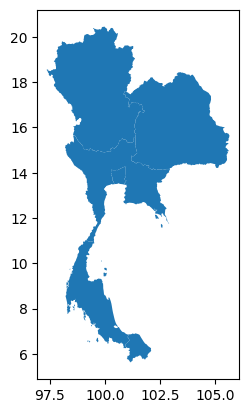

In [100]:
all_area_geometry = []

for region_id in all_region_id:
    interested_df = geodf[geodf["REGION_ID"] == region_id]
    all_area_geometry.append(interested_df.geometry.union_all())

all_area_boundary_df = gpd.GeoDataFrame(geometry=all_area_geometry, crs=geodf.crs)
all_area_boundary_df["REGION_ID"] = all_region_id
all_area_boundary_df["REGION_NAME"] = all_area_name
centroid = all_area_boundary_df["geometry"].centroid
all_area_boundary_df["centroid_x"] = centroid.x
all_area_boundary_df["centroid_y"] = centroid.y
all_area_boundary_df.plot()
all_area_boundary_df

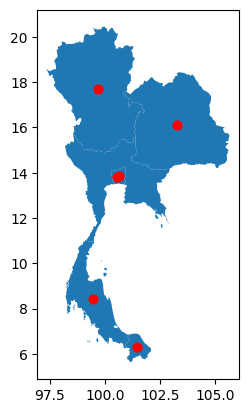

In [109]:
all_area_boundary_df.plot()
plt.scatter(all_area_boundary_df["centroid_x"], all_area_boundary_df["centroid_y"], c='r', s=40)

In [101]:
all_area_boundary_df["REGION_NAME"][0]

'GBKK'

<Axes: >

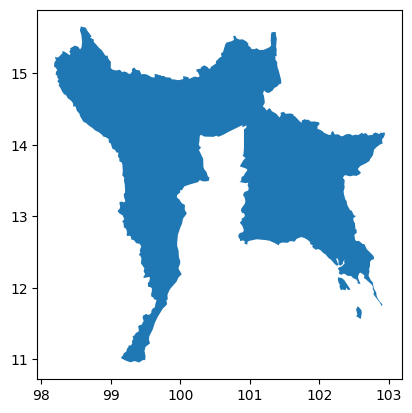

In [102]:
all_area_boundary_df.iloc[3:4].plot()

In [103]:
region_output_path = "../../data/geojson/thailand-region.geojson"
all_area_boundary_df.to_file(region_output_path, driver="GeoJSON")




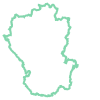

In [55]:
north_polygon = north_df.geometry.union_all()
north_boundary = north_polygon.boundary
north_boundary

(97.12684885, 102.00929015, 14.6246296, 20.741122400000002)

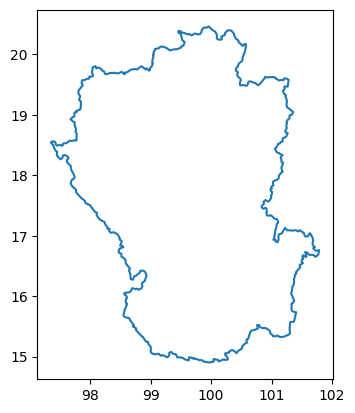

In [63]:
from matplotlib import pyplot as plt

north_xs = north_boundary.coords.xy[0]
north_ys = north_boundary.coords.xy[1]

plt.plot(north_xs, north_ys)
plt.axis('scaled')


<Axes: >

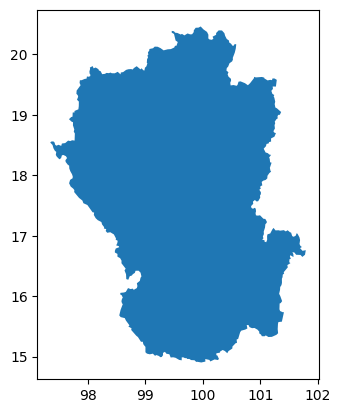

In [67]:
north_boundary_df = gpd.GeoDataFrame(geometry=[north_polygon], crs=north_df.crs)
north_boundary_df.plot()

In [75]:
geodf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [76]:
north_df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich